# Task 1: Logistic Regression for Binary Classification

## Library

In [111]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

## Load Data

In [112]:
# Load Data
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

data1 = pd.read_csv(os.path.join(DATA_DIR, "churn-bigml-20.csv"))
data2 = pd.read_csv(os.path.join(DATA_DIR, "churn-bigml-80.csv"))

In [113]:
print("churn-bigml-20.csv Data:")
display(data1)
print("churn-bigml-80.csv Data:")
display(data2)

churn-bigml-20.csv Data:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


churn-bigml-80.csv Data:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [114]:
print("churn-bigml-20.csv Data Shape:", data1.shape)
print("churn-bigml-80.csv Data Shape:", data2.shape)

churn-bigml-20.csv Data Shape: (667, 20)
churn-bigml-80.csv Data Shape: (2666, 20)


In [115]:
data = pd.concat([data1, data2], ignore_index=True)

In [116]:
print(data["Churn"].value_counts())

Churn
False    2850
True      483
Name: count, dtype: int64


In [117]:
print(data["Churn"].value_counts(normalize=True) * 100)

Churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


## Preprocessing Data

In [118]:
# Preprocessing
data.drop(columns=["State", "Area code"], inplace=True)
data["International plan"] = data["International plan"].map({"No": 0, "Yes": 1})
data["Voice mail plan"] = data["Voice mail plan"].map({"No": 0, "Yes": 1})
data["Churn"] = data["Churn"].astype(int)

## Split Data

In [119]:
# Split Data
X = data.drop(columns=["Churn"])
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Oversampling (Replacing SMOTE)

In [120]:
# Oversampling the minority class (Churn = 1)
churn_1 = X_train[y_train == 1]
y_churn_1 = y_train[y_train == 1]
n_samples = y_train.value_counts()[0]  # Match majority class count
X_train_oversampled = pd.concat([X_train, churn_1.sample(n=n_samples, replace=True, random_state=42)])
y_train_oversampled = pd.concat([y_train, y_churn_1.sample(n=n_samples, replace=True, random_state=42)])

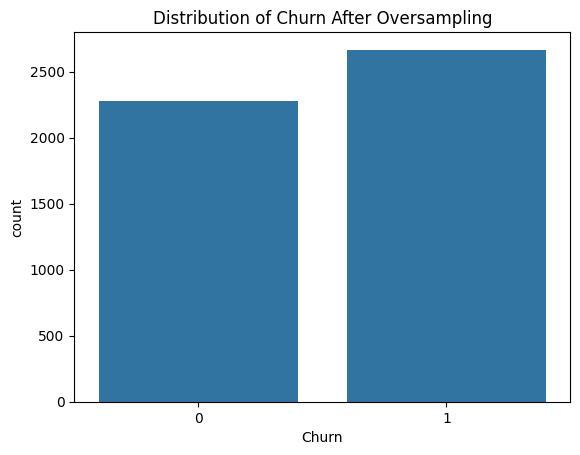

In [121]:
# Show distribution after oversampling
sns.countplot(x=y_train_oversampled)
plt.title("Distribution of Churn After Oversampling")
plt.show()

## Train Model

In [122]:
# Train Model with Grid Search for Hyperparameter Optimization
param_grid = {"C": [0.01, 0.1, 1, 10, 100], "solver": ["liblinear", "lbfgs"]}
grid_search = GridSearchCV(LogisticRegression(max_iter=500, class_weight="balanced", random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_oversampled, y_train_oversampled)

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "iprint": iprint,
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [123]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'solver': 'lbfgs'}


## Predict

In [124]:
# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

## Evaluate

In [125]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
print("Accuracy:", accuracy)
print("Precision:", class_report['1']['precision'])
print("Recall:", class_report['1']['recall'])
print("F1-score:", class_report['1']['f1-score'])

Accuracy: 0.7766116941529235
Precision: 0.3719806763285024
Recall: 0.8020833333333334
F1-score: 0.5082508250825083


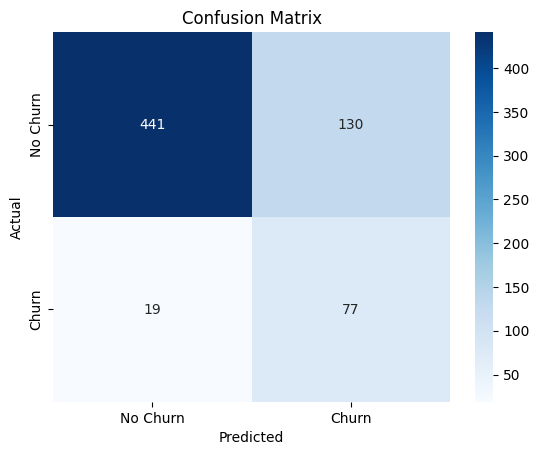

In [126]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Coefficients & Odds Ratio

In [127]:
# Coefficients & Odds Ratio
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": best_model.coef_[0]})
coefficients["Odds Ratio"] = np.exp(coefficients["Coefficient"])
print("Feature Importance (Odds Ratio):")
display(coefficients.sort_values(by="Odds Ratio", ascending=False))

Feature Importance (Odds Ratio):


,Feature,Coefficient,Odds Ratio
1,International plan,2.355670,10.545196
16,Customer service calls,0.551346,1.735588
13,Total intl minutes,0.054168,1.055662
3,Number vmail messages,0.046582,1.047684
15,Total intl charge,0.028303,1.028707
4,Total day minutes,0.010708,1.010766
6,Total day charge,0.007983,1.008014
7,Total eve minutes,0.005453,1.005468
10,Total night minutes,0.002313,1.002316
5,Total day calls,0.001979,1.001981


## ROC Curve

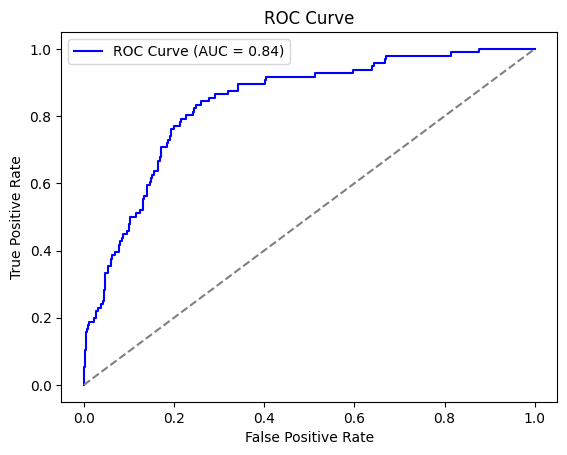

In [128]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

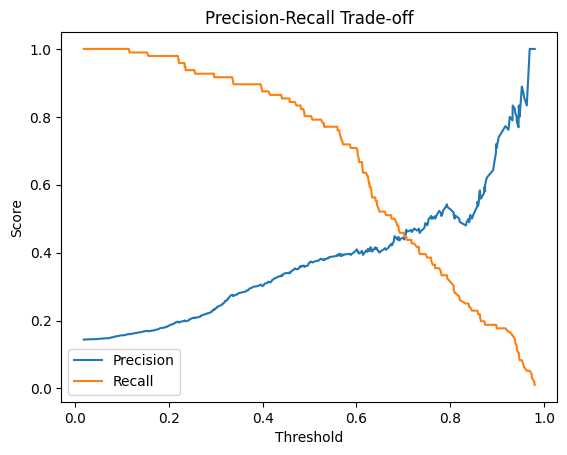

In [129]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Trade-off")
plt.legend()
plt.show()

## Result & Visualization

In [130]:
# Print Results
print("Accuracy:", accuracy)

# Convert the class_report to a pandas DataFrame for better readability
report_df = pd.DataFrame(class_report).transpose()
# To improve the formatting, we can round the numerical values
report_df = report_df.round(3)

print("\nClassification Report:\n")
print(report_df)

Accuracy: 0.7766116941529235

Classification Report:

              precision  recall  f1-score  support
0                 0.959   0.772     0.855  571.000
1                 0.372   0.802     0.508   96.000
accuracy          0.777   0.777     0.777    0.777
macro avg         0.665   0.787     0.682  667.000
weighted avg      0.874   0.777     0.806  667.000


In [131]:
print("Feature Importance (Odds Ratio):")
display(coefficients.sort_values(by="Odds Ratio", ascending=False))

Feature Importance (Odds Ratio):


,Feature,Coefficient,Odds Ratio
1,International plan,2.355670,10.545196
16,Customer service calls,0.551346,1.735588
13,Total intl minutes,0.054168,1.055662
3,Number vmail messages,0.046582,1.047684
15,Total intl charge,0.028303,1.028707
4,Total day minutes,0.010708,1.010766
6,Total day charge,0.007983,1.008014
7,Total eve minutes,0.005453,1.005468
10,Total night minutes,0.002313,1.002316
5,Total day calls,0.001979,1.001981


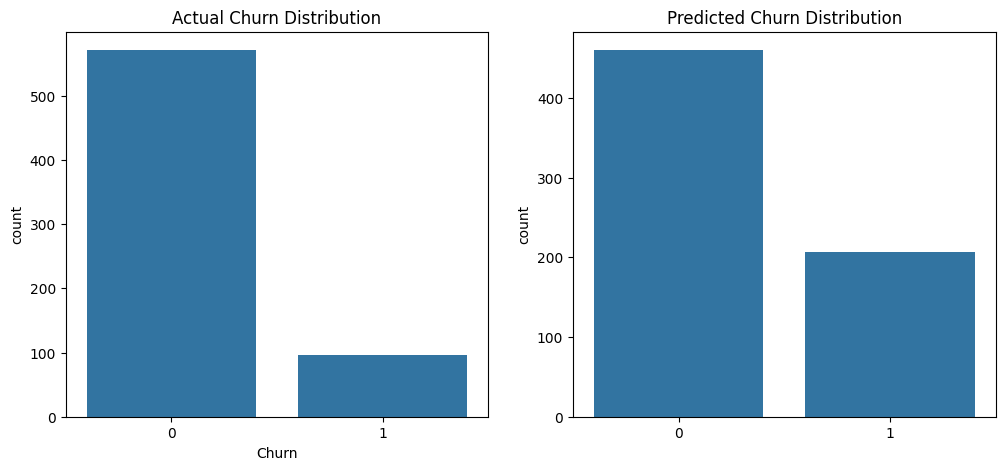

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_test, ax=axes[0])
axes[0].set_title("Actual Churn Distribution")

sns.countplot(x=y_pred, ax=axes[1])
axes[1].set_title("Predicted Churn Distribution")

plt.show()